In [4]:
#import relevant libraries and set up nicely
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,7)
plt.style.use('ggplot')


In [5]:
#Get the data from UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv'
urlretrieve(url, 'non-verbal%20tourist%20data.csv')
df = pd.read_csv(url, sep =',')
df.head(2)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0


In [6]:
# Drop type of client as this is the result of the clustering
df.drop(labels = 'Type of Client', axis = 1, inplace = True)

In [7]:
# Change all non numeric datatypes to objects
df[['Hostile - friendly', 'Tense - relaxed']] = df[['Tense - relaxed', 'Hostile - friendly']].astype('object')

In [8]:
# Cleaning up weird things like '?'bor numbers that appear in categorical features
df['GImg3'].replace('?', 'likes', inplace = True)
df['PImg5'].replace('?', 'dislikes', inplace = True)
df['Authoritative -anarchic '].replace('?', '1', inplace = True)

A little bit of EDA to catch anything interesting

In [9]:
df.describe()

,age
count,73.000000
mean,47.260274
std,15.115323
min,24.000000
25%,36.000000
50%,47.000000
75%,56.000000
max,81.000000


Of the 73 respondents, the youngest is 24 and the oldest is 81. The average customer in this survey is 47 years old. Roughly 75% of the people who participated are about 56 years old

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'england'),
  Text(1, 0, 'canada'),
  Text(2, 0, 'germany'),
  Text(3, 0, 'argentina'),
  Text(4, 0, 'polish'),
  Text(5, 0, 'scotland'),
  Text(6, 0, 'italy'),
  Text(7, 0, 'russia'),
  Text(8, 0, 'spain'),
  Text(9, 0, 'hungary'),
  Text(10, 0, 'uruguay'),
  Text(11, 0, 'brasil'),
  Text(12, 0, 'colombia'),
  Text(13, 0, 'chile'),
  Text(14, 0, 'cuba'),
  Text(15, 0, 'mexico')])

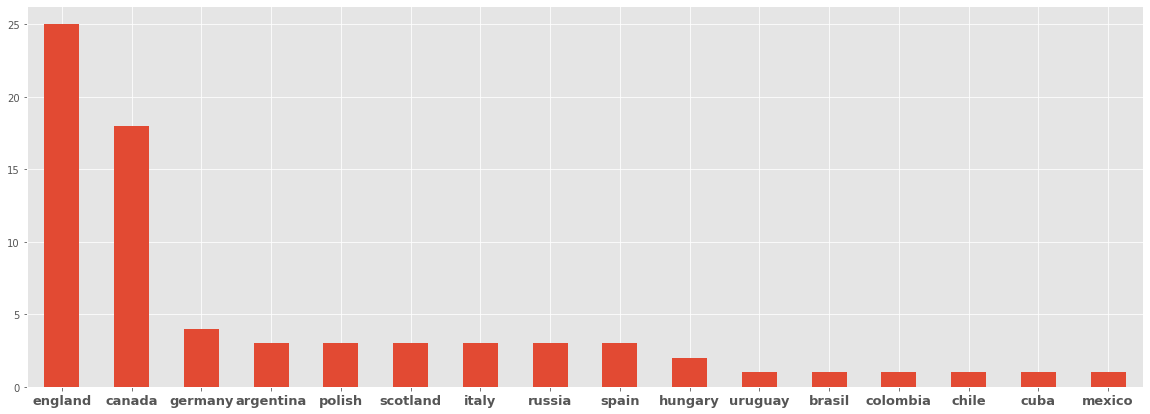

In [10]:
plt.figure(figsize=(20, 7))
df['country'].value_counts().plot(kind = 'bar',)
plt.xticks(rotation =0, fontweight = 'bold', fontsize = 13)


More people from England and Canada participated in the survey

(array([11.,  6., 13.,  6.,  8., 14.,  4.,  5.,  1.,  5.]),
 array([24. , 29.7, 35.4, 41.1, 46.8, 52.5, 58.2, 63.9, 69.6, 75.3, 81. ]),
 <BarContainer object of 10 artists>)

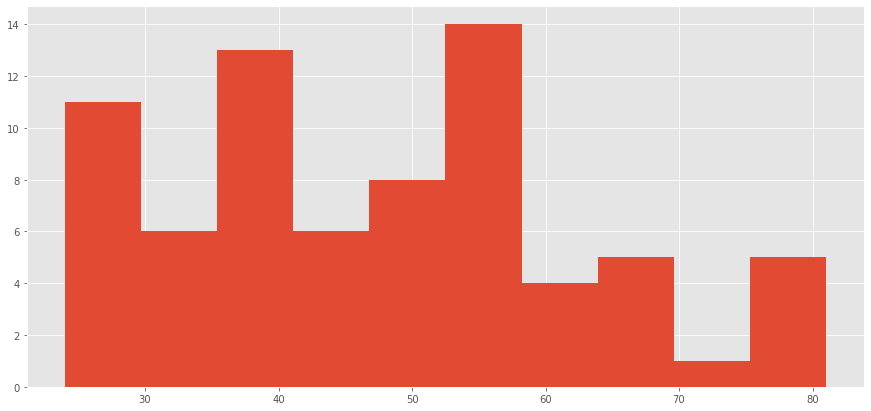

In [11]:
plt.hist('age', data = df) 

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

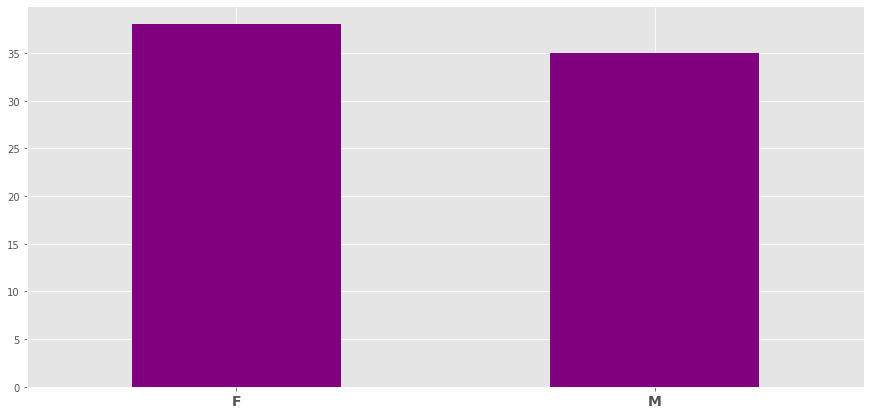

In [12]:
df['sex'].value_counts().plot(kind ='bar', color ='purple')
plt.xticks(rotation =0, fontsize=14,fontweight='bold' )

(array([0, 1, 2]),
 [Text(0, 0, 'likes'), Text(1, 0, 'indiferent'), Text(2, 0, 'dislikes')])

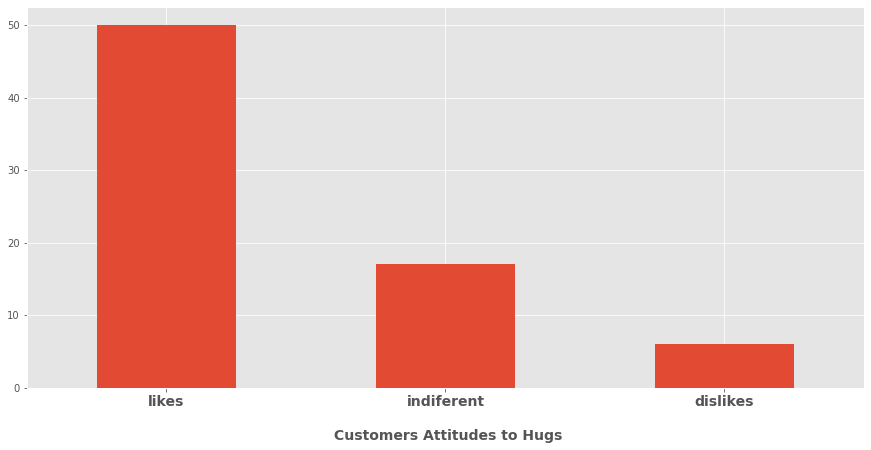

In [13]:
df['GImg1'].value_counts().plot(kind= 'bar')
plt.xlabel("\n Customers Attitudes to Hugs", fontsize=14,fontweight='bold')
plt.xticks(rotation = 0, fontsize=14,fontweight='bold')

Now that EDA is done, the main task- identifying different types of customers in the data using patterns aka customer segmentation
###### The data has no label thus, this is a clustering and not a classification task. Clustering simply put is placing items with similar characteristics into buckets.

In [14]:
from scipy.cluster.hierarchy import linkage, fcluster
from kmodes.kprototypes import KPrototypes

In [15]:
#create an array of the features
df_array = df.values

In [17]:
#use the clustering algorithim on the categorical fields
kproto = KPrototypes(n_clusters= 4, verbose=2, max_iter= 20)
clusters = kproto.fit_predict(df_array, categorical = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 4, ncost: 5786.685246999023
Run: 1, iteration: 2/20, moves: 3, ncost: 5717.995415849546
Run: 1, iteration: 3/20, moves: 2, ncost: 5659.859245125419
Run: 1, iteration: 4/20, moves: 8, ncost: 5315.639556234807
Run: 1, iteration: 5/20, moves: 6, ncost: 5145.330083638017
Run: 1, iteration: 6/20, moves: 5, ncost: 5029.336493173271
Run: 1, iteration: 7/20, moves: 1, ncost: 5025.349519489061
Run: 1, iteration: 8/20, moves: 0, ncost: 5025.349519489061
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 12, ncost: 5319.736699387427
Run: 2, iteration: 2/20, moves: 7, ncost: 4986.769983760878
Run: 2, iteration: 3/20, moves: 2, ncost: 4962.0187586896545
Run: 2, iteration: 4/20, moves: 0, ncost: 4962.0187586896545
Init: initializing centroids
Init: initia

In [18]:
cluster_dict = []
for c in clusters:
    cluster_dict.append(c)

In [20]:
df['cluster'] = cluster_dict
df['cluster'].value_counts()

0    25
2    22
3    13
1    13
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

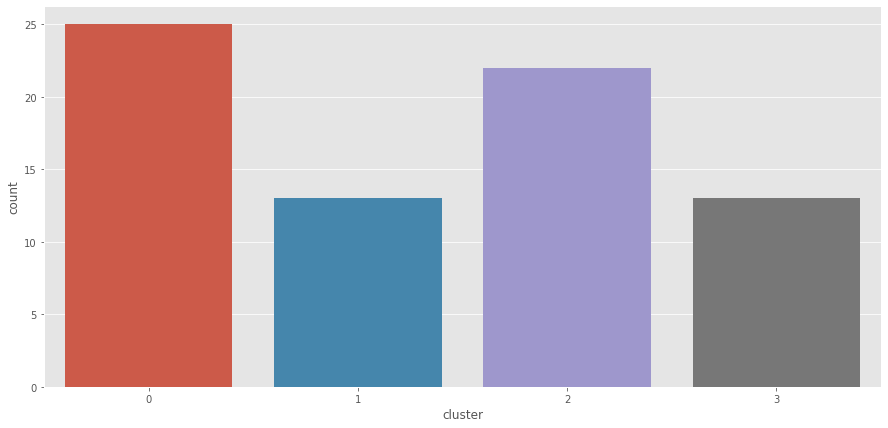

In [21]:
sns.countplot(x='cluster', data=df)

Text(0.5, 0, 'Number of clusters')

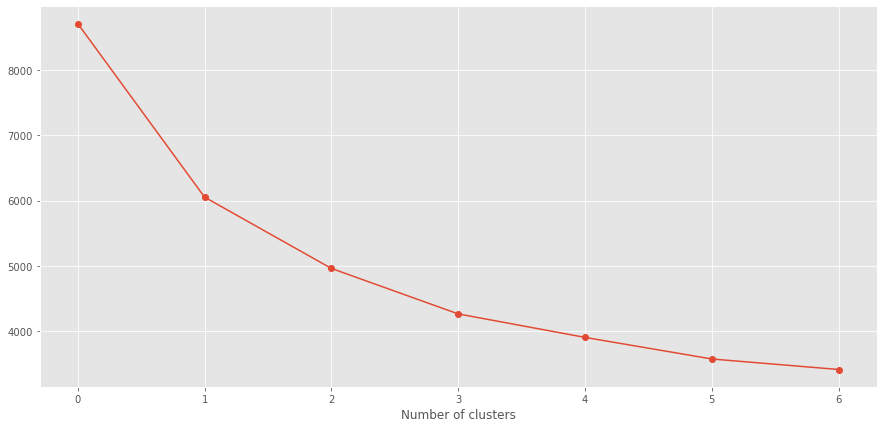

In [22]:
#Use the elbow method to find an optimum number of clusters
cost = []
for num_clusters in list(range(2,9)):
    try:
        kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
        kproto.fit_predict(df_array, categorical = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
        cost.append(kproto.cost_)
    except:
        print(f"Can't cluster with {num_clusters} clusters")

plt.plot(cost, marker ='o')
plt.xlabel('Number of clusters')